<h1>Exploratory Data Analysis (EDA)</h1>

In [2]:
#Importing necessary packages
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import scipy
import pickle
import IPython.display as ipd
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [4]:
df = pd.read_csv("C:/Users/lajja/Desktop/se489-mlops/data/music-dataset/features_3_sec.csv")

<Axes: xlabel='label'>

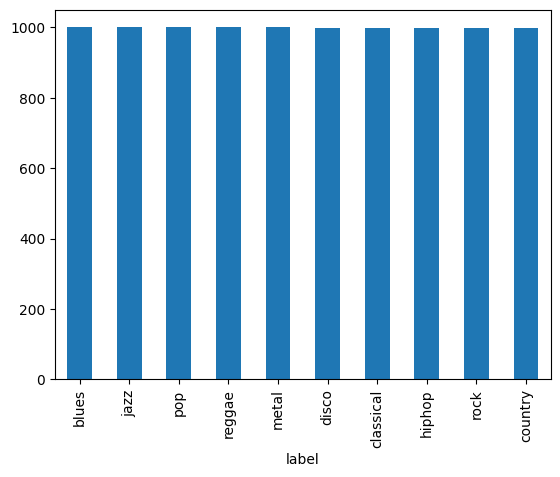

In [5]:
df['label'].value_counts().plot.bar() # checking if the dataset is balanced or not

This indicates that the dataset is already balanced. Therefore, no further balancing is required for any machine learning processes that require an even distribution of classes. This is beneficial as it helps in avoiding bias towards any particular music genre when training machine learning models.

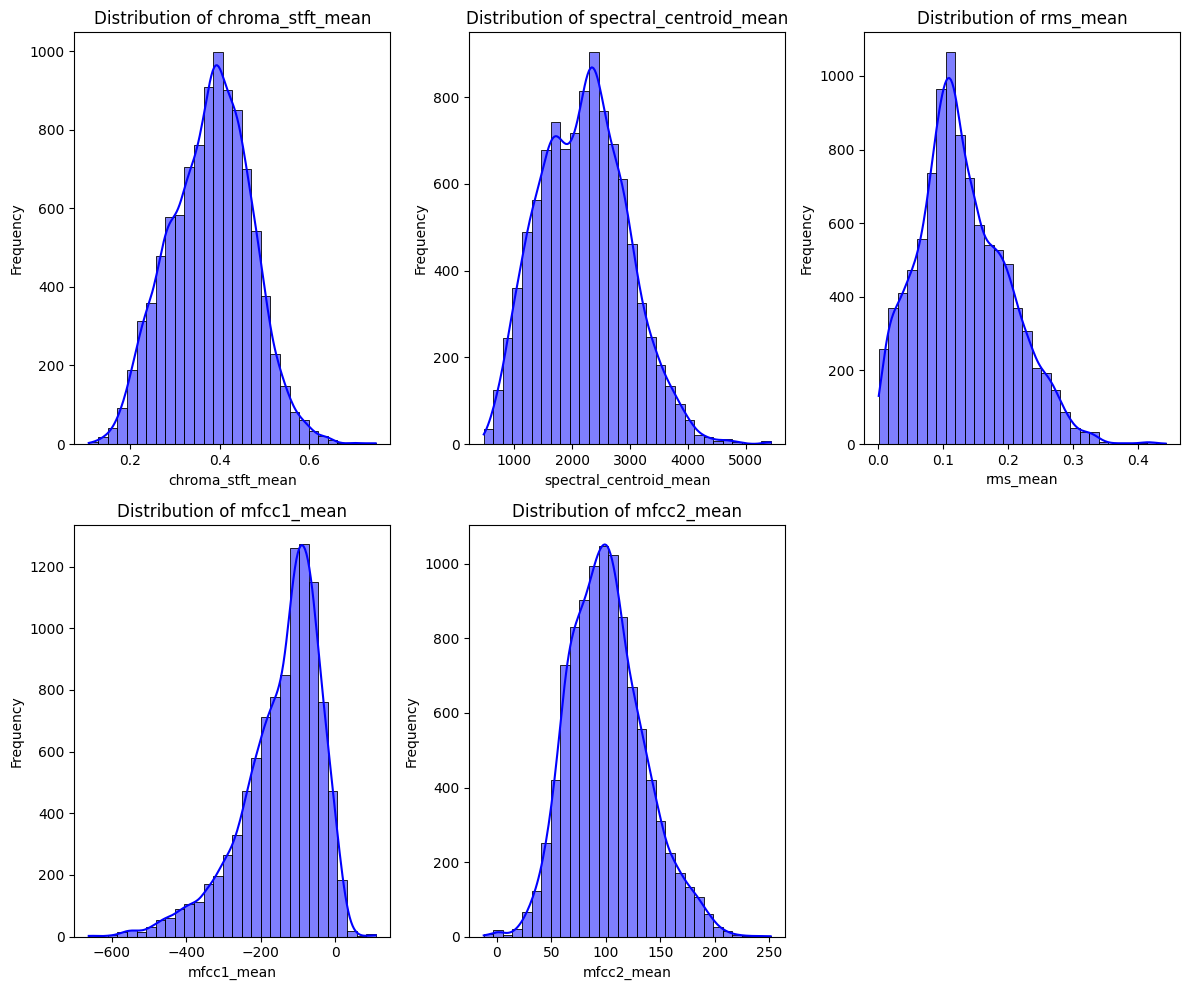

In [6]:
# List of selected features
selected_features = ['chroma_stft_mean', 'spectral_centroid_mean', 'rms_mean', 'mfcc1_mean', 'mfcc2_mean']

# Plot histograms for the selected features
plt.figure(figsize=(12, 10))

for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True, color='blue', bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


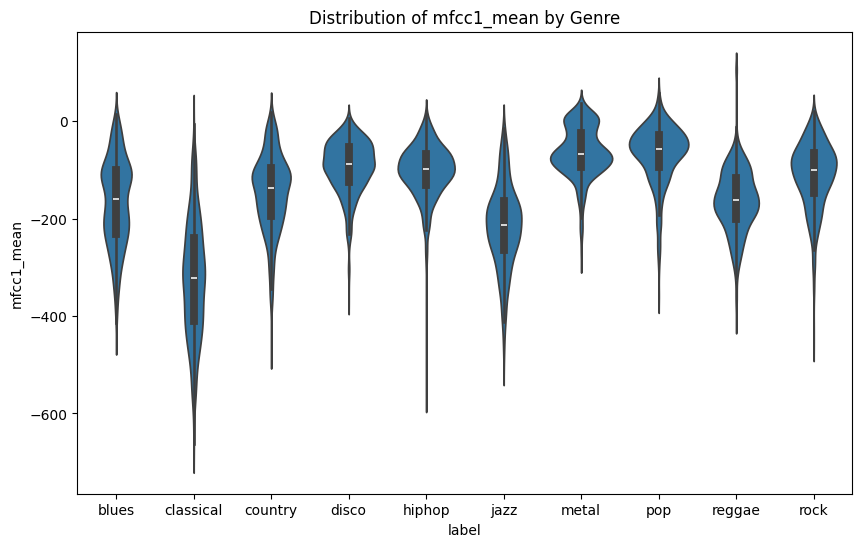

In [7]:
# Violin plot to show distribution of 'mfcc1_mean' by label
plt.figure(figsize=(10, 6))
sns.violinplot(x='label', y='mfcc1_mean', data=df)
plt.title('Distribution of mfcc1_mean by Genre')
plt.show()


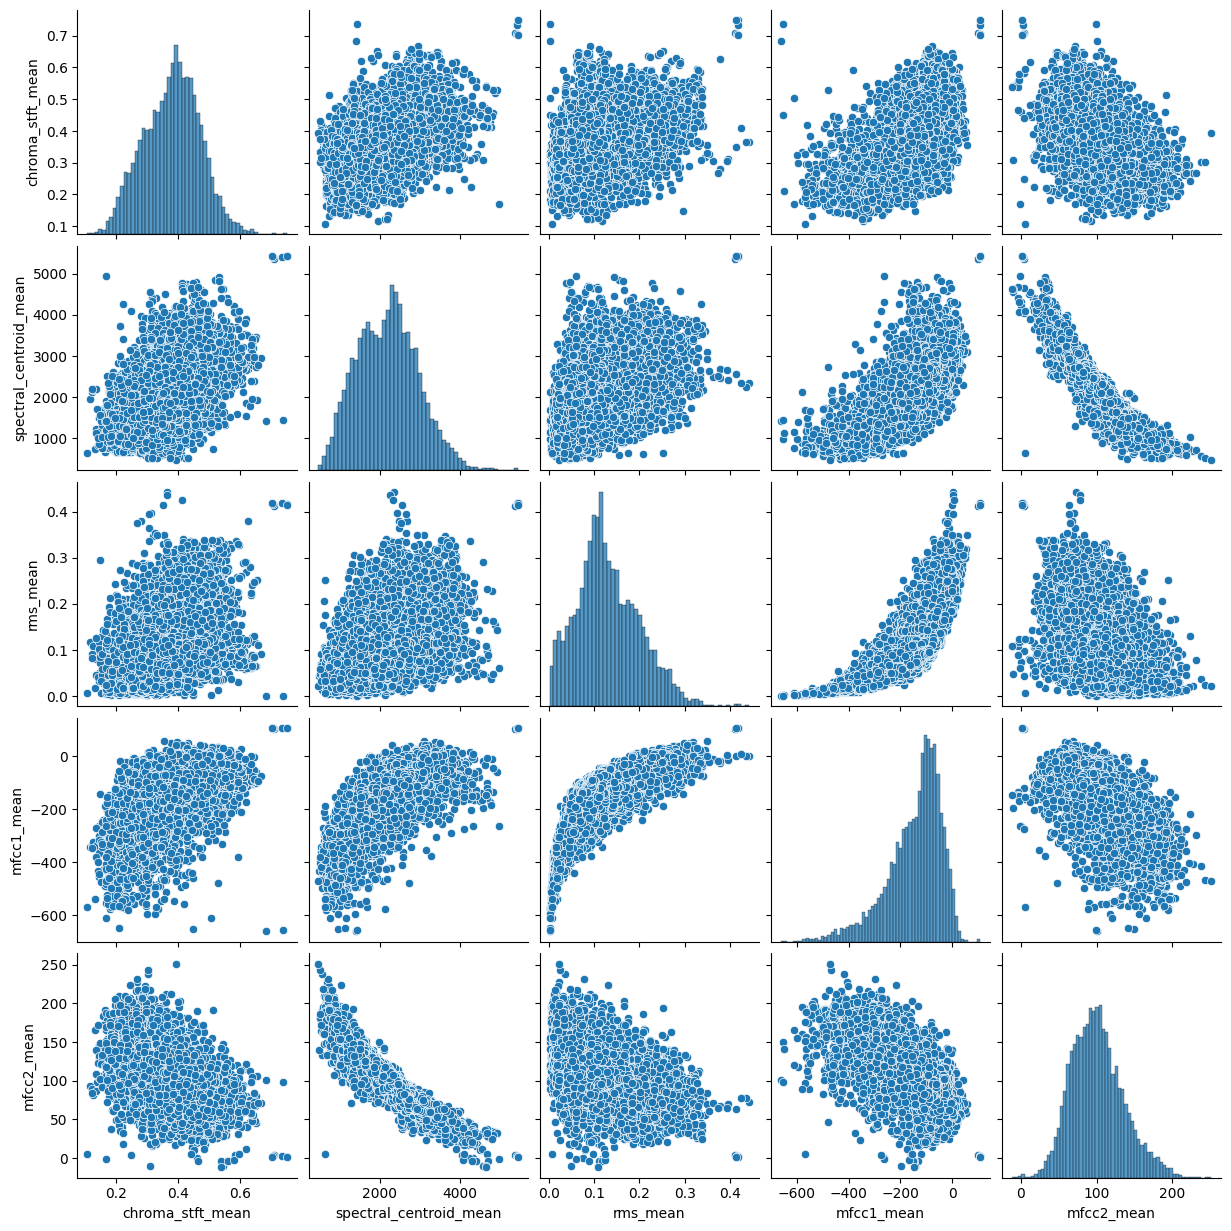

In [8]:
# Pairplot for a subset of features
sns.pairplot(df[['chroma_stft_mean', 'spectral_centroid_mean', 'rms_mean', 'mfcc1_mean', 'mfcc2_mean']])

C:\Users\lajja\AppData\Local\Temp\ipykernel_30224\2177285845.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=features, palette='viridis')


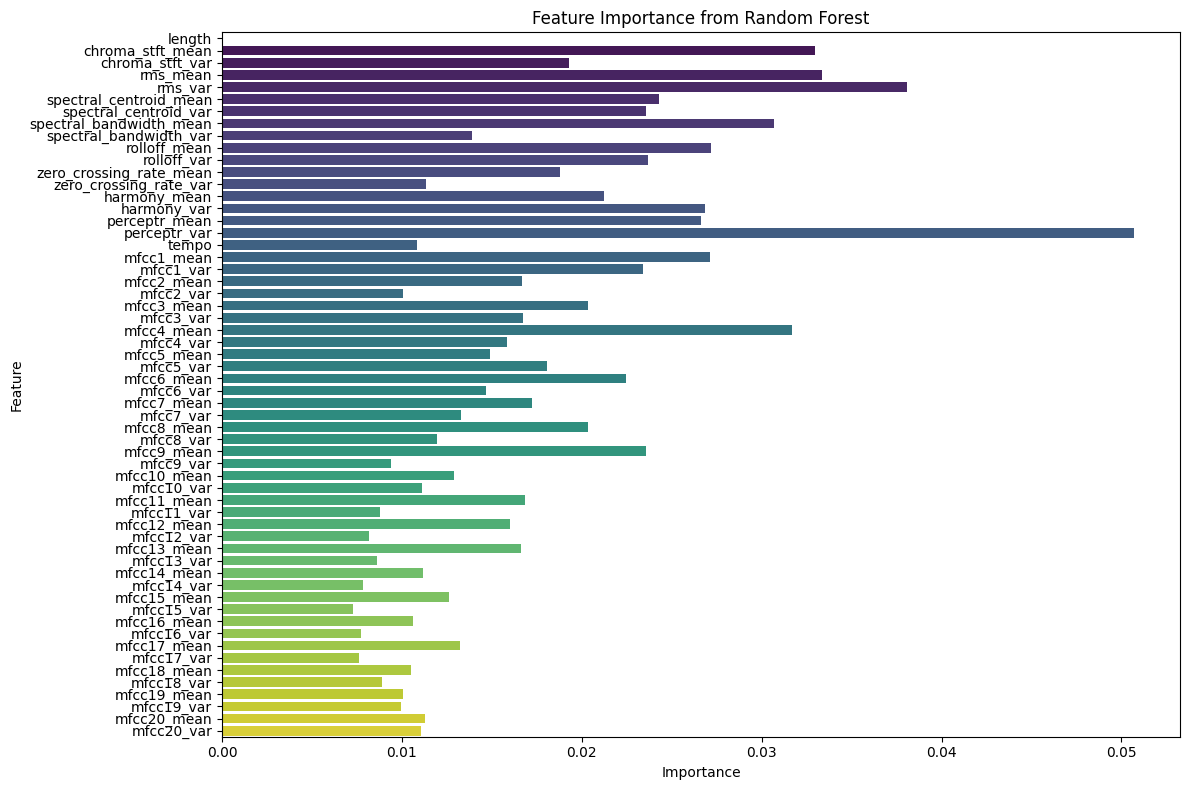

In [14]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Drop non-numeric columns like 'filename'
X = df.drop(columns=['filename', 'label'])

# Encode target labels (strings → integers)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['label'])

# Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Feature importances
feature_importances = model.feature_importances_
features = X.columns

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances, y=features, palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

